## Housekeeping



-   Some references for today
    -   <span class="underline">[Official pytorch tutorials](https://pytorch.org/tutorials/)</span>
    -   <span class="underline">[Pytorch tutorials by yunjey, from beginning to advanced](https://github.com/yunjey/pytorch-tutorial)</span>
    -   <span class="underline">[Deep Learning Book on ConvNets](https://www.deeplearningbook.org/contents/convnets.html)</span>
    -   <span class="underline">[MIT Intro to Deep Learning Lecture on ConvNets](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3)</span>
-   Today's url 
    -   [https://git.io/2020deep06](https://git.io/2020deep06)
-   Email if you need help with any of this!



## What do we want a neural network to do?



![img](mnist_digits_examples.png)

-   Thinking of our mnist dataset from last week and a 2 layer hidden
    network, we might expect/want the network to piece together a
    structure like this
    -   In the first layer, find loops and lines in the various parts of the image
    -   In the second layer, see if they combine together (fire at the
        same time), in certain combinations
-   In the example, theres a "loop" a the top connected to a "line" for
    9, a similar "loop" at the bottom but connect to a "hook", a "line"
    similar to that in 9 for the 1, and some "hooks" for the 3
-   Is the network structured this way? I.e. are there "loop", "hook",
    "line" finders

idea from <span class="underline">[3blue1brown on neural nets](https://www.youtube.com/watch?v=aircAruvnKk)</span>



## What does it really do?



### :BMCOL:



![img](filter_weights_mnist.png)



### :BMCOL:



-   Plot of the weights from each pixel connection in the first layer of
    a 2 hidden layer model from MNIST (red means this pixel should be
    fired to fire this node, blue means that if the pixel is fired the
    node is suppressed)
-   Maybe recognizable structures, but lots of fairly random swirls
-   One issue with the network is that structures like loops and lines
    need to be fit, but these can appear in different places on the image



### :B_ignoreheading:



-   So, we don't have a "loop finder" node, we need to find loops in any
    of many different points on the image, leading to a jumble of weights
-   Can we change our network so "loop finder" structures are possible?



## Convolutional Layers



-   A convolution layer is a connection between one layer and the next
    in a NN with a very specific structure:
    -   Typically, it works with a 3d input like an image: channels (red,
        green, blue), width, height
    -   It contains a **kernel** or **filter**, which is a 3d block sized
        $channel \times n \times m$, $n$ and $m$ are user-specifed, with
        each element of the block a weight to be set in training
    -   The outputs consists of all $n \times m$ *convolutions* of the
        filter with the image, creating a new one-channel image
        -   Discrete convolution, meaning each element of the kernel is
            multiplied with a pixel in (one channel of) the image, and all
            are summed together
    -   The output of the filter is passed through an activation function,
        the same as the usual fully-connected layer
-   A single convolutional layer generally consists of many
    convolutional filters, each filter giving one layer in the output
-   Networks with convolutional layers are Convolutional Neural
    Networks: CNN



## Convolutional Filters In Pictures



![img](conv_schem-0.png)

![img](conv_schem-1.png)

![img](conv_schem-2.png)

![img](conv_schem-3.png)

![img](conv_schem-4.png)

![img](conv_schem-5.png)

![img](conv_schem-6.png)

![img](conv_schem-7.png)



### :BMCOL:



![img](conv_schem-8.png)



### :BMCOL:



-   A [filter](olive) sliding over the [image](MyGreen) builds up the [output layer](red), each
    output is sum of filter elements multiplied by image pixels
-   The same filter is used for each pixel, the weights are learnt
    during training (as well as an output bias)



## Example Filter



![img](edge_detection.png)

-   As an example, here is a 3x3 filter for detecting vertical edges
-   The opposing plus and minus sides cancel in a [block of color](MyGreen)
-   [At an edge](red), the filter is either highly positive (white to left of
    edge), or negative (white to right of edge)
-   What would a horizontal edge detector look like?

Andrew Ng lecture by way of [https://kharshit.github.io/blog/2018/12/14/filters-in-convolutional-neural-networks](https://kharshit.github.io/blog/2018/12/14/filters-in-convolutional-neural-networks)



## Multiple Filter Outputs



![img](multiple_layers.png)

-   When multiple filters are used in a single layer, they have the same
    width and height, so they can be put together in a single output as
    $channels \times width \times height$
-   This is exactly the image structure which was the input to the
    network
-   This means this convolutional structure can be used several times in
    series
    -   Each successive layer effectively sees a larger part of the image,
        since each pixel in the output of one layer is from several pixels
-   The image shows that a 3-channel input needs filters with a 3x3x3
    block, and 2 filters produce a 2 channel output



## Filters Over Several Input Layers



![img](features.png)

-   Convolutional layers are typically built up one after the other
-   The idea is that features get *built up*, at low levels, you might
    have edge detectors, later layers use these edges to build up
    structure, and by high levels recognizable objects are being
    searched for
    -   These images are made by doing reverse gradient descent on the
        network, i.e. updating the image pixels themselves, trying to make
        the image "light up" (set node output high) a particular node
-   Networks these days can contain *hundreds* of these layers
    -   This is the meaning of *deep* in deep learning

Image from [https://twopointseven.github.io/2017-10-29/cnn/](https://twopointseven.github.io/2017-10-29/cnn/)



## Strides and Padding



![img](strides-padding.jpg)

-   When sliding across the image, you can move the filter more than 1
    pixel at a time, this is the *stride*
    -   By default its just 1, ie sliding the image
-   The filter will reduce the size of the image (can only fit in so
    many 3x3 blocks), you can *pad* the image (with zeros, or copying
    the outer variables) to keep the outputs the same size
-   Can also use different strides or pads in the vertical and
    horizontal directions



## Pooling Layers



-   We may want to reduce the size of the images flowing through the
    network for computational and conceptual efficiency reasons
    -   As we add filters, we should be building up higher level features,
        which are less localized on the image
    -   Another way to say this is we want to *downsample* the image
-   We can reduce the image through *pooling*, applying an operation on
    each $n \times n$ patch of the image (leaping **not** sliding)
-   A typical use is max pooling, we could find the maximum of each
    patch of the image
-   Here, we apply a $2 \times 2$ max pooling to reduce a $4 \times 4$
    matrix to $2 \times 2$
-   Another typical operation is to take the *average* of each patch



## Structuring a Network with Convolutional Layers



![img](network.png)

-   The basic CNN consists of several convolutional layers, followed by
    "squashing" the output of the last convolution into a regular 1d
    node structure, after which the fully connected layers of a normal
    NN can be used
-   So the idea is, the convolutional layers search for particular high
    level "features", then the output is decided by which features do or
    do not exist in the network

Image from [https://twopointseven.github.io/2017-10-29/cnn/](https://twopointseven.github.io/2017-10-29/cnn/)



## Some Benefits of The Convolutional Neural Network



-   Fewer parameters than a fully connected network
    -   Parameters for a cxhxw image fully connected to n nodes: cxhxwxn + n
    -   Parameters for a cxhxw image convolutional to n mxm filters (no padding/stride 1): cxmxmxn + n
    -   If our filter size is smaller than the image, much, much fewer
        parameters, and independent of input height, width
    -   Fewer parameters is better for overtraining
-   The sliding connections mean the network can learn features independent of position
    -   A fully connected layer would need to learn what a 'hand' or an
        'eye' looks like independently everywhere it could be in the image
    -   This *parameter sharing* between parts of the image means that the
        network can learn more robust features



## Convolutional Filters in pytorch



-   torch.nn.Conv2d provides a convolutional filter, you tell it:
    -   The number of input channels
    -   The number of output channels
    -   The size of the filter (can be a number for nxn or a 2-tuple for nxm)
    -   Optionally, you can change the stride and the padding
-   The filters take in tensors of rank 4, with shape: `(number of
      images, number of channels, height of image, width of image)`
    (pytorch always assumes you're processing multiple images)
-   The output is also a rank 4 tensor, with the number of output
    channels changed, and the height and width can be expanded or
    contracted by changing the stride and padding



In [1]:
# convolutional filter from 1 -> 2 channels, with 3x3 filter
conv_filter = torch.nn.Conv2d(1,2,3)
conv_filter(torch.tensor([ [ [[1,1,1],[1,1,1],[1,1,1.]] ] ]))

tensor([[[[-0.2259]],
         [[-0.1640]]]], grad_fn=<MkldnnConvolutionBackward>)

## Pooling Layers in pytorch



-   Similar to Conv2d, there is `torch.nn.MaxPool2d` and `torch.nn.AvgPool2d` to max and average pooling respectively,
-   They only need to be given the filter size, and have similar
    input/output shapes (rank-4 tensors everywhere)



In [1]:
pool = torch.nn.MaxPool2d(2)
pool(torch.tensor([ [ [[1,2,3,4],[1,1,1,1],
                       [1,1,1.,1],[4,5,6,7]] ] ]))

tensor([[[[2., 4.],
          [5., 7.]]]])

In [1]:
pool = torch.nn.AvgPool2d(2)
pool(torch.tensor([ [ [[1,2,3,4],[1,1,1,1],
                       [1,1,1.,1],[4,5,6,7]] ] ]))

tensor([[[[1.2500, 2.2500],
          [2.7500, 3.7500]]]])

## Building a Network



-   Networks will at some point need to go from processing 2d images
    with multiple channels, to a discrete probability distribution (if
    we are making a classifier)
-   You can insert a `view` into the `forward` function to adjust the
    output nodes into a 1d line (-1 at the front so it automatically
    sizes to any number of images in the input)
-   Here is a simple CNN for MNIST with 1 convolutional layer, which is
    reshaped and then connected to the 10 category output layer



In [1]:
class SimpleCNN(torch.nn.Module):
  def __init__(self):
    super(SimpleCNN, self).__init__()
    self.conv = torch.nn.Conv2d(1,6,5) # 5x5 filter, no padding
    self.fc = torch.nn.Linear(6*24*24,10)
  def forward(self, x):
    x = torch.tanh(self.conv(x))
    x = self.fc(x.view(-1, 6*24*24))
    return x

In [1]:
sum(p.numel() for p in net.parameters())
print(net)
print(list(p.numel() for p in net.parameters()))

SimpleCNN(
  (conv): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (fc): Linear(in_features=3456, out_features=10, bias=True)
)
[150, 6, 34560, 10]

## Exercises



We will train 2 convolutional networks in pytorch.

Checking convolution filters

Lets download some images of cats and dogs.



In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O cats_and_dogs_filtered.zip
!unzip cats_and_dogs_filtered.zip
!ls

torch.Size([424, 500])

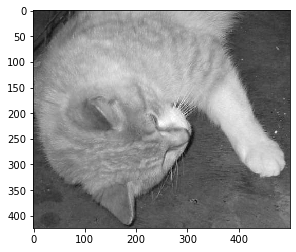

In [1]:
import PIL
import numpy as np

cat = PIL.Image.open("cats_and_dogs_filtered/train/cats/cat.240.jpg")
cat = np.array(cat)
cat = np.average([cat[:,:,0], cat[:,:,1], cat[:,:,2]], axis=0)/255
plt.imshow(cat, cmap='gray')
cat = torch.tensor(cat)
cat.shape

Lets see the effect of a few specific filters on our cat image.



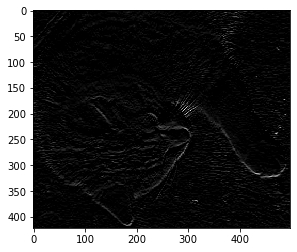

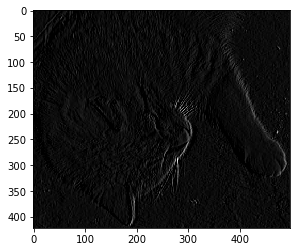

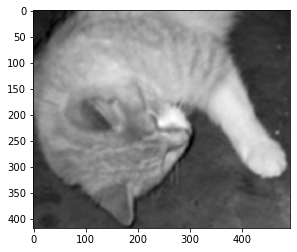

In [1]:
import torch.nn.functional as F
hfilt = torch.tensor([ [1,2,1.], [0,0,0.], [-1.,-2,-1]])
out = F.conv2d(cat.view(1,1,424,500).float(), hfilt.view(1,1,3,3))
plt.imshow(F.relu(out.view(422,498)), cmap='gray')
plt.show()
vfilt = torch.tensor([ [1,0,-1.], [2,0,-2.], [1.,0,-1]])
out = F.conv2d(cat.view(1,1,424,500).float(), vfilt.view(1,1,3,3))
plt.imshow(F.relu(out.view(422,498)+0.1), cmap='gray')
plt.show()
filt = torch.tensor([ [1,1,1.,1,1,1,1]*7])
out = F.conv2d(cat.view(1,1,424,500).float(), filt.view(1,1,7,7))
_=plt.imshow(out.view(418,494), cmap='gray')

Training a convnet. 

LeNet 5 was the first convolutional neural network, created all the
way back in the dark ages of 1998.  It was designed to perform
handwriting digit recognition for the US post office. MNIST was in
fact created to show that CNN were superior for this task.

The structure of LeNet-5 is shown below:

![img](lenet5.png)

This is interpreted as the input image starting at the bottom, and it
gets processed by the succsessive layers with the output of one layer
flowing to the next. Note that the diagram indicates whether the
conv2d layers are zero padded to keep the output the same size as the
input, and the number of output channels, and filter size are
indicated in the diagram. (Also, technically, LeNet-5 has some
slightly non-standard layer features that never caught / were never
found useful in the deep learning community, so this is a simplified
version). The activation functions after the layers are tanh, insert
an activation after the pooling and fully connected layers.

Here is the code to load MNIST (don't forget to change the directory!).



In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToTensor()
train = torchvision.datasets.MNIST('~/data/torchvision', train=True, download=True, transform=trans)
test = torchvision.datasets.MNIST('~/data/torchvision', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(train, batch_size=64)
testloader = torch.utils.data.DataLoader(test, batch_size=64)

Based on the structure given above, create LeNet-5 in pytorch, and
train it on the MNIST dataset. What is the best loss/accuracy you can
achieve? ([LeCun was able to get to 99%](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) using some tricks we'll see
later in the course)

Keep track of the test/train curve (sample several times an epoch),
and check for overtraining, and show the accuracy of your best
model.

If training is taking to long, check you're running on the GPU (!).



In [1]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    self.c1 = torch.nn.Conv2d(1,6,5,padding=2)
    self.c2 = torch.nn.Conv2d(6,16,5)
    self.avg = torch.nn.AvgPool2d(2)
    self.fc1 = torch.nn.Linear(16*5*5,120)
    self.fc2 = torch.nn.Linear(120,84)
    self.fc3 = torch.nn.Linear(84,10)
  def forward(self, x):
    x = torch.tanh(self.avg(self.c1(x)))
    x = torch.tanh(self.avg(self.c2(x)))
    x = self.fc1(x.view(-1, 16*5*5))
    x = self.fc2(torch.tanh(x))
    x = self.fc3(torch.tanh(x))
    return x

net = LeNet5()
net(iter(trainloader).next()[0])

optim = torch.optim.Adam(net.parameters(), lr=0.001)
lossf = torch.nn.CrossEntropyLoss()
for epoch in range(3):
  tl,tn = 0.,0.
  for ii, (i, o) in enumerate(trainloader):
    optim.zero_grad()
    loss = lossf(net(i), o)
    loss.backward()
    optim.step()
    tl+=loss.item()*i.size(0)
    tn+=i.size(0)
    if ii % 25 == 0:
      print("epoch", epoch, "batch", ii, tl/tn)
      tl,tn = 0.,0.

In [1]:
ta,tl,tn = 0.,0.,0.
for ii, (i, o) in enumerate(testloader):
  no = net(i)
  loss = lossf(no, o)
  tl+=loss.item()*i.size(0)
  ta+=torch.sum(torch.max(no,axis=1)[1]==o)
  tn+=i.size(0)
print("test", tl/tn, ta/tn)

test 0.11570307726860046 tensor(0.9650)

Similar to MNIST above, `torchvision.datasets.FashionMNIST` can
download the Fashion-MNIST, which is a more difficult version of
MNIST. Instead of handwritten numbers, you have black and white images
of various items of clothing, which you should train a classifier to
distinguish.

Copying the MNIST download cell above, download the fashion MNIST
data, and then, display a few images from the dataset using
matplotlib. Also, check `train.classes` to see what the different
categories in the Fashion-MNIST dataset are. Can you recognize the
different categories in your images?



In [1]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

trans = transforms.ToTensor()
train = torchvision.datasets.FashionMNIST('~/data/torchvision', train=True, download=True, transform=trans)
test = torchvision.datasets.FashionMNIST('~/data/torchvision', train=False, download=True, transform=trans)
trainloader = torch.utils.data.DataLoader(train, batch_size=64)
testloader = torch.utils.data.DataLoader(test, batch_size=64)

| T-shirt/top | Trouser | Pullover | Dress | Coat | Sandal | Shirt | Sneaker | Bag | Ankle boot |

Write and train a network to distinguish clothing categories from the
Fashion MNIST data. Try to get the best accuracy on the test set you
can. Since we have more compute power than LeCun could have dreamed of
in the 90s (GPUs weren't really feasible to train on until 2012), you
can expand and adapt the LeNet-5 network as you like. You can add more
convolutional filters, and change the filter sizes, increase or
decrease the hidden layers, try different activation functions, and so
on. As you make changes, run and see how the training time and overall
accuracy changes. Train and compare at least 3 networks.

